# SVM Exercises

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn import metrics

Load Pima diabetes dataset

In [ ]:
url = "https://raw.githubusercontent.com/BeaverWorksMedlytics2020/Data_Public/master/NotebookExampleData/Week1/diabetes.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

# YOUR CODE HERE
data = pd.read_csv(url, names=names)
invalid = ['plas', 'pres', 'skin', 'test', 'mass']

for i in invalid:
    data[i].replace(to_replace=0, value=np.nan, inplace=True)
    
data = data.dropna(axis=0).reset_index(drop=True)

data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
1,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
2,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
3,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
4,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


Split data into training, colidation, and test sets with a test size of 25%

In [ ]:
# YOUR CODE HERE
X_cols = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']

y_col = 'class'

test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(data[X_cols], data[y_col], test_size=test_size, random_state=0)


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=0)

Create a model with sklearn's SVC and a high gamma value (perhaps 1.0)

In [ ]:
# YOUR CODE HERE
svm = SVC(gamma=1, C=1)
svm.fit(X_train, y_train)

SVC(C=1, gamma=1)

Print accuracy of training and validation data

In [ ]:
# YOUR CODE HERE
y_train_pred=svm.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred)*100)
y_val_pred=svm.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred)*100)

Training Accuracy is  100.0
Validation Accuracy is  67.56756756756756


Create a model with sklearn's SVC and a low gamma value (perhaps .001)

In [ ]:
# YOUR CODE HERE
svmlg = SVC(gamma=0.001, C=1)
svmlg.fit(X_train, y_train)

SVC(C=1, gamma=0.001)

Print accuracy of training and validation data

In [ ]:
y_train_pred2=svmlg.predict(X_train)
print("Training Accuracy is ", accuracy_score(y_train, y_train_pred2)*100)
y_val_pred2=svmlg.predict(X_val)
print("Validation Accuracy is ", accuracy_score(y_val,y_val_pred2)*100)

Training Accuracy is  87.27272727272727
Validation Accuracy is  74.32432432432432


Explain the accuracy results below. 

The reason why the validation accuracy was higher in the SVM with a low gamma value was because the first model was overfit due to the high gamma value, which lead to a high training accuracy, but a low validation accuracy.

Print the confusion matrices for your high and low gamma models (both numeric and visualized)

Confusion Matrix: Large Gamma 
[[50  0]
 [24  0]]
Confusion Matrix: Small Gamma
[[48  2]
 [17  7]]
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass labels=[0, 1] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator


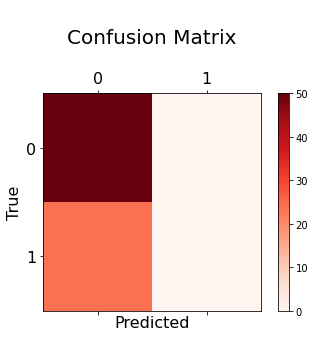

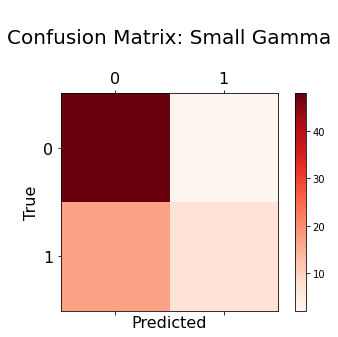

In [ ]:
print('Confusion Matrix: Large Gamma ')
labels = [0,1]
cm = metrics.confusion_matrix(y_val, y_val_pred,labels)
print(cm)

print('Confusion Matrix: Small Gamma')
labels = [0,1]
cm2 = metrics.confusion_matrix(y_val, y_val_pred2,labels)
print(cm2)

# pd.crosstab(y_val, y_val_pred, rownames=['True'], colnames=['Predicted'], margins=True)

def plot_cmatrix(cm,labels,title='Confusion Matrix'):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  cax = ax.matshow(cm,cmap='Reds')
  plt.title('\n'+title+'\n', fontsize=20)
  fig.colorbar(cax)
  ax.set_xticklabels([''] + labels, fontsize=16)
  ax.set_yticklabels([''] + labels, fontsize=16)
  plt.xlabel('Predicted', fontsize=16)
  plt.ylabel('True', fontsize=16)
  plt.show()
  
plot_cmatrix(cm,labels)
plot_cmatrix(cm2, labels, title = 'Confusion Matrix: Small Gamma')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6aa92908-daf4-47cc-a24d-1e94a9949d60' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>